<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/MatrixTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Factorization for Time Series Forecasting

## Context

## About the algorithm

This algorithm is known as `Multivariate Singular Spectrum Analysis (mSSA)`. This is a matrix factorization based method that can help in -
- Time-series forecasting and
- Time series imputation

To learn more about this algorithm, please refer to this [paper](https://arxiv.org/pdf/2006.13448.pdf)

The python library to use this algorithm is not currently present in PyPi. The code repository is present in this GitHub repository: https://github.com/AbdullahO/mSSA. So we will be using a different way to install the library on your local machine. Below we have provided the steps to follow to install this library.

In [1]:
# Clone the repository
!git clone https://github.com/AbdullahO/mSSA.git

Cloning into 'mSSA'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 296 (delta 51), reused 54 (delta 50), pack-reused 228
Receiving objects: 100% (296/296), 14.37 MiB | 11.58 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [2]:
# Move to the cloned repository directory
%cd mSSA

/content/mSSA


In [3]:
!pip install .

Processing /content/mSSA
  Preparing metadata (setup.py) ... done
  Created wheel for mSSA: filename=mSSA-0.1-py3-none-any.whl size=27866 sha256=ac4a4a5680832035591e13b7e7e95141534d1d489f3ed93bbb4fce3c23f59961
  Stored in directory: /tmp/pip-ephem-wheel-cache-zuafp0cp/wheels/ee/ff/c3/bdbf24beb919cd4b47e64e682f9353bdd54ebedeec7cb10239
Successfully built mSSA


Now, the library is installed, and you are ready to use this for time series forecasting.

### Loading libraries

In [4]:
import io

# Python packages for numerical and data frame operations
import numpy as np
import pandas as pd

# Installing the mSSA library
from mssa.mssa import mSSA

# An advanced library for data visualization in python
import seaborn as sns

# A simple library for data visualization in python
import matplotlib.pyplot as plt

# To ignore warnings in the code
import warnings
warnings.filterwarnings('ignore')

### Loading data

The dataset is in a zipped file we will use the below piece of code to unzip the file

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To import the zipfile
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ADSP/RS/LD2011_2014.txt.zip', 'r') as zip_ref:
    zip_ref.extractall()

Once unzip is complete, go to your working directory, you will find a text file named `LD2011_2014.txt`. And check the data by opening this file you will see all the values are separated by `;`. Now we will load this dataset in this notebook session.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Deep learning/LiveSession/nftgroomed.csv')

# Get unique NFT names
unique_nfts = df['name'].unique()

# Prepare a dictionary to store each NFT DataFrame
nft_dfs = {}

for nft in unique_nfts:
    # Filter and select necessary columns
    temp_df = df[df['name'] == nft][['data_retrieved_at', 'v2_floor1h']]

    # Rename the 'v2_sell_now_price' column to the NFT's name
    temp_df.rename(columns={'v2_floor1h': nft}, inplace=True)

    # Store the DataFrame in the dictionary
    nft_dfs[nft] = temp_df

# Initialize a new DataFrame for merging
merged_df = None

# Merge all the DataFrames on 'data_retrieved_at'
for nft, nft_df in nft_dfs.items():
    if merged_df is None:
        merged_df = nft_df
    else:
        merged_df = pd.merge(merged_df, nft_df, on='data_retrieved_at', how='outer')

# Sort by 'data_retrieved_at' and reset the index
merged_df.sort_values('data_retrieved_at', inplace=True)
merged_df.reset_index(drop=True, inplace=True)
for column in merged_df.columns:
    if column != 'data_retrieved_at':  # Exclude the time column from mean calculation
        # Calculate mean and fill NaNs
        merged_df[column] = merged_df[column].fillna(merged_df[column].mean())
# Optional: Save the merged DataFrame
merged_df.to_csv('merged_nft_prices.csv', index=False)


In [8]:
merged_df.head()

,data_retrieved_at,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,...,Saga Pixels,HydraScripts,Mirage Launchpad,FRAKT,Fossils,YOLOMIGOS SPL420,The Suites,Your Big Fren #0,Honeyland Genesis,Mogos
0,2024-01-21 15:45:00,0.000000,-0.021700,-0.0197,-0.01010,-0.039900,0.004700,0.013600,-0.132700,-0.016600,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.018382,0.014133,0.101886
1,2024-01-21 16:00:00,0.000000,-0.024000,-0.0042,-0.01010,-0.046600,0.004700,0.012700,-0.142700,-0.031700,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.018382,0.014133,0.101886
2,2024-01-21 16:15:00,0.000000,-0.040100,0.0144,-0.01620,-0.029700,0.004700,0.012300,-0.090900,0.004000,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.018382,0.014133,0.101886
3,2024-01-21 16:30:00,-0.000174,-0.008800,0.0510,-0.01620,-0.023000,0.003200,0.014600,-0.172400,-0.010300,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.018382,0.014133,0.101886
4,2024-01-21 16:45:00,0.000000,-0.004112,-0.0032,-0.00068,-0.001909,0.003096,-0.000084,-0.017999,-0.000977,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.018382,0.014133,0.101886


In [9]:
merged_df.tail()

,data_retrieved_at,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,...,Saga Pixels,HydraScripts,Mirage Launchpad,FRAKT,Fossils,YOLOMIGOS SPL420,The Suites,Your Big Fren #0,Honeyland Genesis,Mogos
411,2024-01-25 8:45:00,0.000000,-0.012200,-0.0020,0.00000,-0.019100,0.000000,0.000000,0.000000,0.003700,...,-0.152465,0.026215,-0.014100,0.000000,-0.0008,-0.137500,0.0,-0.400000,0.000000,0.101886
412,2024-01-25 9:00:00,0.000000,0.006800,-0.0043,0.00000,-0.006400,0.000000,0.000000,-0.017999,-0.009900,...,-0.152465,0.026215,0.339456,0.036994,0.0129,-0.010186,0.0,-0.281800,0.014133,0.101886
413,2024-01-25 9:15:00,-0.000174,-0.004112,-0.0032,-0.00068,-0.001909,0.003096,-0.000084,0.000000,-0.000977,...,-0.152465,0.026215,0.339456,0.000000,0.0000,-0.137500,0.0,-0.018382,0.000000,0.101886
414,2024-01-25 9:30:00,0.000000,-0.024400,-0.0061,0.00000,-0.002600,0.000000,0.000000,0.000000,0.012300,...,0.000000,0.026215,0.339456,0.000000,0.0000,-0.137500,0.0,-0.282200,0.000000,0.101886
415,2024-01-25 9:45:00,0.000000,-0.012400,-0.0062,0.00000,0.013300,0.000000,-0.002200,0.000000,-0.014200,...,0.000000,0.026215,0.339456,0.000000,0.0000,-0.137500,0.0,-0.080000,0.000000,0.101886


In [10]:
# Picking the first 20 houses and saving it to another variable data_small
data_small = merged_df.iloc[ :, : 21]

In [11]:
data_small.head()

,data_retrieved_at,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,...,SOLS SPL20,$FOCS FOC20,Magic Ticket,Lifinity Flares,Kanpai Pandas,Famous Fox Federation,Deez Nuts,$PLEX MPL20,sloppy seels,little swag world
0,2024-01-21 15:45:00,0.000000,-0.021700,-0.0197,-0.01010,-0.039900,0.004700,0.013600,-0.132700,-0.016600,...,0.000000,-0.030200,0.000000,-0.033200,0.005200,-0.002800,0.052600,-0.062500,-0.056400,-0.0031
1,2024-01-21 16:00:00,0.000000,-0.024000,-0.0042,-0.01010,-0.046600,0.004700,0.012700,-0.142700,-0.031700,...,0.000000,-0.025700,0.000000,-0.033200,0.005200,-0.003500,0.079800,-0.055600,-0.138100,-0.0179
2,2024-01-21 16:15:00,0.000000,-0.040100,0.0144,-0.01620,-0.029700,0.004700,0.012300,-0.090900,0.004000,...,0.000000,-0.041600,0.000000,-0.033200,-0.022100,0.012200,0.079800,-0.032500,-0.143600,-0.0224
3,2024-01-21 16:30:00,-0.000174,-0.008800,0.0510,-0.01620,-0.023000,0.003200,0.014600,-0.172400,-0.010300,...,0.000000,-0.052800,0.000000,-0.017500,0.000000,-0.000600,0.042000,0.000000,-0.184800,-0.0148
4,2024-01-21 16:45:00,0.000000,-0.004112,-0.0032,-0.00068,-0.001909,0.003096,-0.000084,-0.017999,-0.000977,...,-0.000846,-0.002994,0.004503,0.000957,0.000552,0.000322,0.001905,-0.012791,0.003189,-0.0056


In [12]:
data_small.dtypes

data_retrieved_at                   object
Smyths                             float64
CryptoUndeads                      float64
Sujiko Warriors                    float64
Mad Lads                           float64
Saga Monkes                        float64
Homeowners Association (Parcl)     float64
Transdimensional Fox Federation    float64
pingwing                           float64
Open Solmap                        float64
Claynosaurz                        float64
SOLS SPL20                         float64
$FOCS FOC20                        float64
Magic Ticket                       float64
Lifinity Flares                    float64
Kanpai Pandas                      float64
Famous Fox Federation              float64
Deez Nuts                          float64
$PLEX MPL20                        float64
sloppy seels                       float64
little swag world                  float64
dtype: object

In [14]:

# Aggregating the data
data_small['time'] = pd.to_datetime(data_small['data_retrieved_at']).dt.ceil('1h')

data_small = data_small.drop(['data_retrieved_at'], axis = 1)

agg_dict = {}
for col in data_small.columns[ :-1]:
    agg_dict[col] = 'mean'

final_data = data_small.groupby(['time']).agg(agg_dict)
print('data aggregated..')

# See the shape of the data
data_small.shape

data aggregated..


(416, 21)

In [93]:
final_data.head()
final_data.shape


(96, 20)

In [15]:
data_small.shape

(416, 21)

In [95]:
final_data.dtypes

data_retrieved_at                  float64
Smyths                             float64
CryptoUndeads                      float64
Sujiko Warriors                    float64
Mad Lads                           float64
Saga Monkes                        float64
Homeowners Association (Parcl)     float64
Transdimensional Fox Federation    float64
pingwing                           float64
Open Solmap                        float64
Claynosaurz                        float64
SOLS SPL20                         float64
$FOCS FOC20                        float64
Magic Ticket                       float64
Lifinity Flares                    float64
Kanpai Pandas                      float64
Famous Fox Federation              float64
Deez Nuts                          float64
$PLEX MPL20                        float64
sloppy seels                       float64
dtype: object

In [16]:
final_data.shape

(96, 20)

In [17]:
final_data.dtypes

Smyths                             float64
CryptoUndeads                      float64
Sujiko Warriors                    float64
Mad Lads                           float64
Saga Monkes                        float64
Homeowners Association (Parcl)     float64
Transdimensional Fox Federation    float64
pingwing                           float64
Open Solmap                        float64
Claynosaurz                        float64
SOLS SPL20                         float64
$FOCS FOC20                        float64
Magic Ticket                       float64
Lifinity Flares                    float64
Kanpai Pandas                      float64
Famous Fox Federation              float64
Deez Nuts                          float64
$PLEX MPL20                        float64
sloppy seels                       float64
little swag world                  float64
dtype: object

In [57]:
final_data.head()

,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,Claynosaurz,SOLS SPL20,$FOCS FOC20,Magic Ticket,Lifinity Flares,Kanpai Pandas,Famous Fox Federation,Deez Nuts,$PLEX MPL20,sloppy seels,little swag world
time,,,,,,,,,,,,,,,,,,,,
2024-01-21 16:00:00,0.000000,-0.022850,-0.011950,-0.010100,-0.043250,0.004700,0.013150,-0.137700,-0.024150,-0.003900,0.000000,-0.027950,0.000000,-0.033200,0.005200,-0.00315,0.066200,-0.059050,-0.097250,-0.010500
2024-01-21 17:00:00,-0.000043,-0.006678,0.012400,-0.009820,-0.016277,0.002999,0.010354,-0.095775,-0.001944,0.000368,-0.000411,-0.032923,0.001126,-0.008361,-0.005387,0.00298,0.053526,-0.011098,-0.126228,-0.010775
2024-01-21 18:00:00,-0.000043,-0.004828,-0.009175,-0.000170,-0.007827,0.001099,-0.010746,-0.029775,-0.002544,-0.000582,-0.009686,-0.029448,0.001126,0.004314,0.008838,0.00133,0.036051,-0.005848,-0.073253,-0.010900
2024-01-21 19:00:00,-0.000043,-0.014228,0.000900,-0.002320,0.013773,0.000774,-0.000021,-0.051525,-0.008294,-0.010657,-0.009286,0.009577,0.001126,0.000239,0.004488,0.00088,0.008926,-0.043198,-0.035778,-0.010700
2024-01-21 20:00:00,-0.000043,0.058772,0.001150,-0.002895,-0.000477,0.000774,-0.002596,-0.081000,-0.005319,-0.012707,-0.000211,-0.005598,0.001126,0.018614,0.000088,-0.00007,-0.001749,-0.033323,-0.112078,-0.001400


In [24]:
# Creating training and the testing set
train_data = final_data.loc['2024-01-21' : '2024-01-23']

test_data = final_data.loc['2024-01-24': ]

In [25]:
train_data.head()

,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,Claynosaurz,SOLS SPL20,$FOCS FOC20,Magic Ticket,Lifinity Flares,Kanpai Pandas,Famous Fox Federation,Deez Nuts,$PLEX MPL20,sloppy seels,little swag world
time,,,,,,,,,,,,,,,,,,,,
2024-01-21 16:00:00,0.000000,-0.022850,-0.011950,-0.010100,-0.043250,0.004700,0.013150,-0.137700,-0.024150,-0.003900,0.000000,-0.027950,0.000000,-0.033200,0.005200,-0.00315,0.066200,-0.059050,-0.097250,-0.010500
2024-01-21 17:00:00,-0.000043,-0.006678,0.012400,-0.009820,-0.016277,0.002999,0.010354,-0.095775,-0.001944,0.000368,-0.000411,-0.032923,0.001126,-0.008361,-0.005387,0.00298,0.053526,-0.011098,-0.126228,-0.010775
2024-01-21 18:00:00,-0.000043,-0.004828,-0.009175,-0.000170,-0.007827,0.001099,-0.010746,-0.029775,-0.002544,-0.000582,-0.009686,-0.029448,0.001126,0.004314,0.008838,0.00133,0.036051,-0.005848,-0.073253,-0.010900
2024-01-21 19:00:00,-0.000043,-0.014228,0.000900,-0.002320,0.013773,0.000774,-0.000021,-0.051525,-0.008294,-0.010657,-0.009286,0.009577,0.001126,0.000239,0.004488,0.00088,0.008926,-0.043198,-0.035778,-0.010700
2024-01-21 20:00:00,-0.000043,0.058772,0.001150,-0.002895,-0.000477,0.000774,-0.002596,-0.081000,-0.005319,-0.012707,-0.000211,-0.005598,0.001126,0.018614,0.000088,-0.00007,-0.001749,-0.033323,-0.112078,-0.001400


In [29]:
test_data.tail()

,Smyths,CryptoUndeads,Sujiko Warriors,Mad Lads,Saga Monkes,Homeowners Association (Parcl),Transdimensional Fox Federation,pingwing,Open Solmap,Claynosaurz,SOLS SPL20,$FOCS FOC20,Magic Ticket,Lifinity Flares,Kanpai Pandas,Famous Fox Federation,Deez Nuts,$PLEX MPL20,sloppy seels,little swag world
time,,,,,,,,,,,,,,,,,,,,
2024-01-25 11:00:00,-0.000043,-0.006753,-0.005325,-0.000170,-0.016552,0.000774,-0.000021,-0.015575,-0.005294,-0.008857,-0.000211,-0.003973,-0.000199,-0.005486,-0.010937,0.000080,0.006776,-0.012791,0.003189,-0.001400
2024-01-25 12:00:00,-0.000025,-0.010907,-0.006800,-0.000389,-0.002877,0.001769,0.000038,-0.002571,0.001356,-0.005859,-0.000483,0.008858,0.000859,-0.001020,-0.002785,0.000184,-0.033956,-0.012791,0.003189,-0.011029
2024-01-25 13:00:00,-0.000043,-0.015653,0.002625,-0.000170,-0.004827,0.000774,-0.000021,-0.005025,-0.000294,-0.001957,-0.000211,0.051602,0.005901,-0.001261,-0.055112,0.000080,0.068926,-0.012791,0.003189,0.021100
2024-01-25 14:00:00,-0.000035,-0.000240,-0.002740,0.001280,-0.040340,0.000640,-0.000140,-0.011460,-0.011760,-0.007840,-0.000169,0.012161,-0.002660,0.000191,-0.019180,-0.000480,0.056301,-0.012791,0.003189,-0.009760
2024-01-25 15:00:00,0.000000,-0.004112,-0.003200,-0.000680,-0.001909,0.003096,-0.000084,-0.033300,-0.000977,0.001471,0.000000,-0.025000,0.004503,0.000000,0.000552,0.000322,0.060200,-0.012791,0.003189,-0.014400


In [157]:
# Determine the split point
split_point = int(len(final_data) * 0.8)

# Split the data
train_df = final_data[:split_point]
test_df = final_data[split_point:]


Let's check how the training and test data looks like

### Model building

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/time_series_7.PNG)

\We can further explore the `page matrix` as:

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/time_series_8.PNG)

As our data is now ready, we can use the algorithm to fit the training data for forecasting. Before fitting the data, let's check what are the hyper-parameters this algorithm uses and what is their meaning?

In [27]:
# To get the details of the algorithm
help(mSSA)

Help on class mSSA in module mssa.mssa:

class mSSA(builtins.object)
 |  mSSA(rank=None, rank_var=1, T=25000000, T_var=None, gamma=0.2, T0=10, col_to_row_ratio=5, agg_method='average', uncertainty_quantification=True, p=None, direct_var=True, L=None, persist_L=None, normalize=True, fill_in_missing=False, segment=False, agg_interval=None, threshold=None)
 |  
 |  :param rank: (int) the number of singular values to retain in the means prediction model
 |  :param rank_var: (int) the number of singular values to retain in the variance prediction model
 |  :param gamma: (float) (0,1) fraction of T after which the last sub-model is fully updated
 |  :param segment: (bool) If True, several sub-models will be built, each with a moving windows of length T.
 |  :param T: (int) Number of entries in each submodel in the means prediction model
 |  :param T0: (int) Minimum number of observations to fit a model. (Default 100)
 |  :param col_to_row_ratio: (int) the ratio of no. columns to the number o

As you can see from above, mSSA class can take several parameters that might affect its performance. Specifically, the parameter `rank` (int), which determines the `number of singular values` to retain in the means prediction model. The default value is `None`, where the model will choose an appropriate rank using the method in the paper:
[The Optimal Hard Threshold for Singular Values is 4/√3](https://arxiv.org/pdf/1305.5870.pdf)

We can also tune the 'rank' hyperparameter and choose the optimal value depending on the dataset. Here, we will use rank = 20.

In [55]:
model = mSSA(rank = 20)

# Updating the model
model.update_model(test_data)

### Prediction

#### Forecasting one hour ahead for the next day

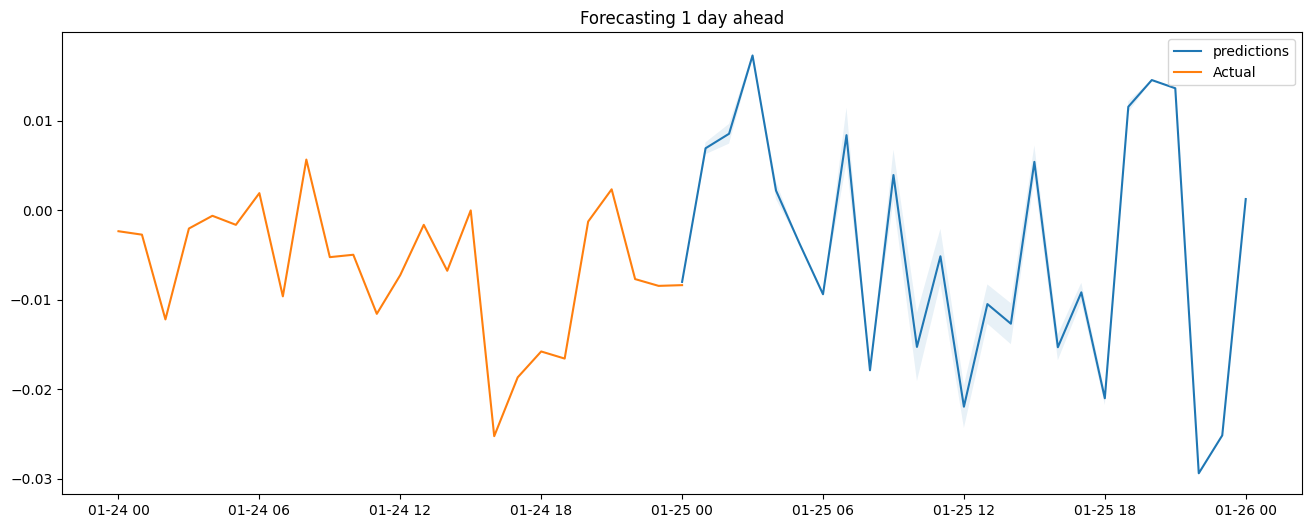

In [33]:
# Define the prediction dataframe
df = model.predict('CryptoUndeads', '2024-01-25', '2024-01-26')

# Set the figure size
plt.figure(figsize = (16, 6))

plt.plot( df['Mean Predictions'], label = 'predictions')

plt.fill_between(df.index, df['Lower Bound'], df['Upper Bound'], alpha = 0.1)

plt.plot(test_data['CryptoUndeads'].iloc[:len(df['Mean Predictions'])], label = 'Actual', alpha = 1.0)

# Set the title of the plot
plt.title('Forecasting 1 day ahead')

plt.legend()

plt.show()

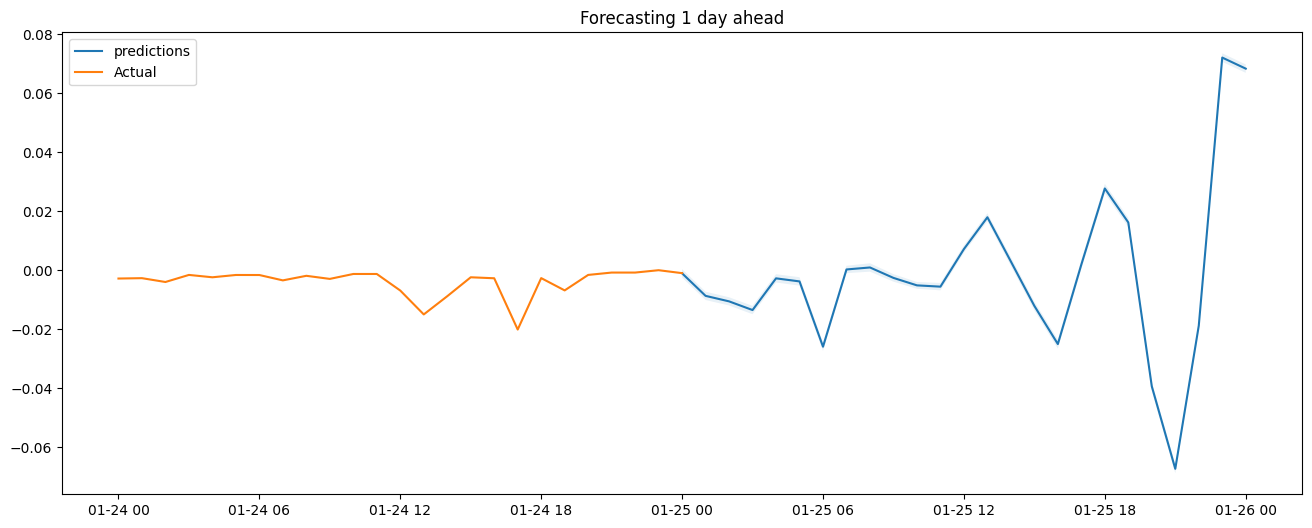

In [62]:
# Define the prediction dataframe
df = model.predict('Sujiko Warriors', '2024-01-25', '2024-01-26', confidence = 99.9)

# Set the figure size
plt.figure(figsize = (16, 6))

plt.plot( df['Mean Predictions'], label = 'predictions')

plt.fill_between(df.index, df['Lower Bound'], df['Upper Bound'], alpha = 0.1)

plt.plot(test_data['Sujiko Warriors'].iloc[:len(df['Mean Predictions'])], label = 'Actual', alpha = 1.0)

# Set the title of the plot
plt.title('Forecasting 1 day ahead')

plt.legend()

plt.show()

### Observation:

Now, we will do a more quantitative test by forecasting the next seven days using a rolling window approach. Specifically, we will forecast the next seven days one day at a time for all 20 houses. Note that between forecasts, `we will incrementally train the data on the already predicted timeframe`.

In [60]:
# Initialize prediction array
predictions = np.zeros((len(test_data.columns), 24*7))

upper_bound = np.zeros((len(test_data.columns), 24*7))

lower_bound = np.zeros((len(test_data.columns), 24*7))

actual = test_data.values[ :24 * 2, : ]

# Specify start time
start_time = pd.Timestamp('2024-01-19 01:00:00')

# Predict for seven days
days = 2

for day in range(days):

    # Get the final timestamp in the day
    end_time = start_time + pd.Timedelta(hours = 23)

    # Convert timestamps to string
    start_str = start_time.strftime('%Y-%m-%d %H:%M:%S')

    end_str = end_time.strftime('%Y-%m-%d %H:%M:%S')

    # Predict for each house
    for i, column in enumerate(test_data.columns):

        # Let us create the forecast
        df_30 = model.predict(column, start_str, end_str)

        predictions[i, day * 24 : (day + 1) * 24] = df_30['Mean Predictions']

        upper_bound[i, day * 24 : (day + 1) * 24] = df_30['Upper Bound']

        lower_bound[i, day * 24 : (day + 1) * 24] = df_30['Lower Bound']

    # Fit the model with the already predicted values
    df_insert = test_data.iloc[day * 24 : 24 * (day + 1), : ]

    # Update the model
    model.update_model(df_insert)

    # Update start_time
    start_time = start_time + pd.Timedelta(hours = 24)

IndexError: index -1 is out of bounds for axis 0 with size 0

Now, let us calculate the error.

In [ ]:
Y = actual[ :, : ]
Y_h = predictions.T[ :, : ]
mse = np.sqrt(np.mean(np.square(Y - Y_h)))
print ('Forecasting accuracy (RMSE):', mse)

Forecasting accuracy (RMSE): 27.921274055416802


Now, let's inspect our forecasts visually for all the 20-time series.

NameError: name 'predictions' is not defined

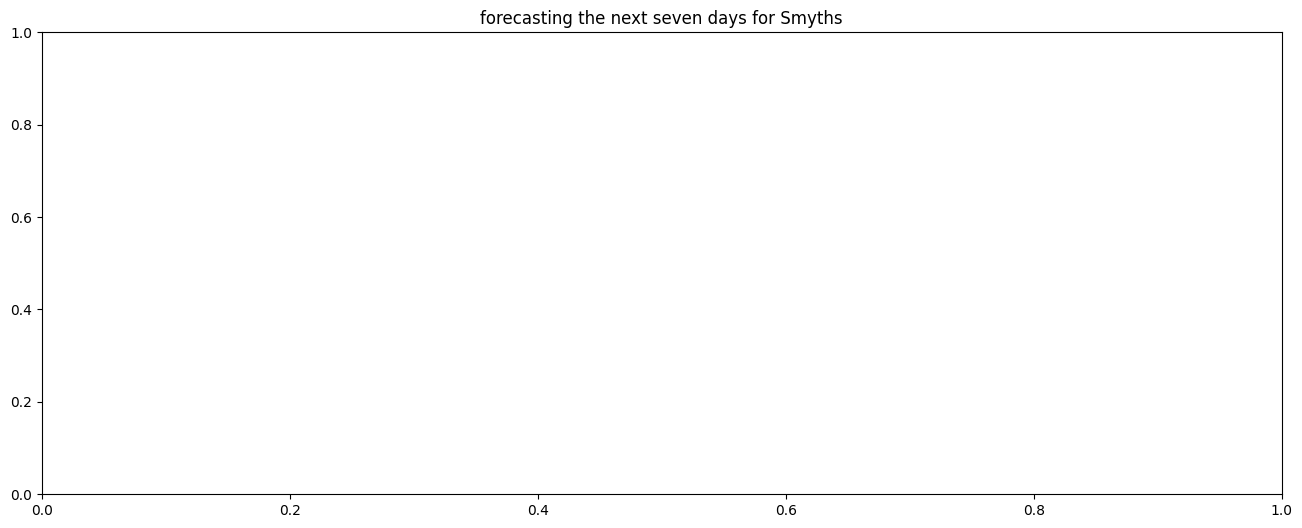

In [34]:
for i in range(20):

    # Set the figure size
    plt.figure(figsize = (16, 6))
    # Set the title
    plt.title('forecasting the next seven days for %s'%test_data.columns[i])
    plt.plot(predictions[ i, : 24 * 7], label = 'predictions')
    plt.fill_between(np.arange(24 * 7), lower_bound[ i, : 24 * 7], upper_bound[i, : 24 * 7], alpha = 0.1)
    plt.plot(actual[: 24 * 7, i ], label = 'actual')
    plt.legend()
plt.show()

### Conclusion

For all the above 20 different time series predictions on `test data,` this model has performed very well in all the time series except for a few ones like `MT_003`, `MT_013`, and `MT_014`. The poor performance of those three-time series might be because they were noisier than other time series. If you look into the time series above `MT_003`, you will see that some days the consumption goes to zero, which does not look correct.

So to further improve this model on those time series, we might want to
- clean the data first, by first understanding what has caused those noisy data points and/or
- by tuning/grid searching optimal hyper-parameters of this algorithm (e.g. - rank, gamma, col_to_row_ratio, L etc)

### Imputing missing values

This algorithm works very well in imputing missing values as well. To understand this, let's add some missing values in any of the time series above randomly. Here we are creating missing values for the entity `MT_001` in `20%` of days for January in 2014. We only use this data for imputing the missing values for `MT_001` which we created.

Before we apply the missing values, let's first save the original time series in a separate variable, so that we can compare them with the imputed values at a later point in time.

In [ ]:
# Creating the copy of the original time series
final_ts = pd.DataFrame(final_data['MT_001'].loc['2014-01-01 01:00:00':'2014-01-08 01:00:00']).copy()

Now we will create missing values randomly in `20%` of the observations, save them in a different variable and create a pandas data frame from it.

In [ ]:
# Creat a time series with missing values
ts_with_missing_values = final_data['MT_001'].loc['2014-01-01 01:00:00':'2014-01-08 01:00:00']

ts_with_missing_values.loc[ts_with_missing_values.sample(frac = 0.2).index] = np.nan

ts_with_missing_values = ts_with_missing_values.rename('MT_001_with_missing_values')

ts_with_missing_values = pd.DataFrame(ts_with_missing_values).reset_index()

Now, let's plot the time series and see how it looks like:

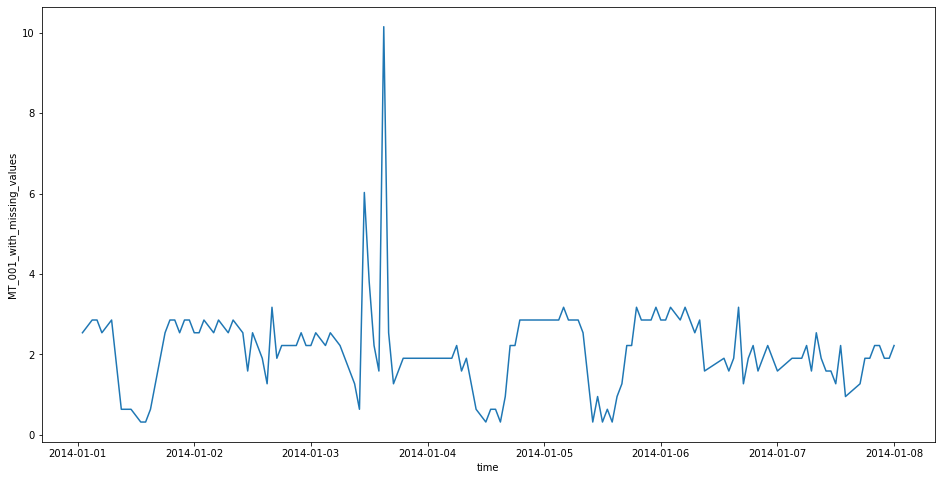

In [ ]:
# Creating the plot

# Fix the figure size
figure = plt.figure(figsize = (16, 8))

# Creating the line plot
sns.lineplot(data = ts_with_missing_values,
             x = 'time',
             y = 'MT_001_with_missing_values');

Now, let's build the model and pass the time series with missing values into it.

In [ ]:
# Time series with missing vlaues
ts_with_missing_values = ts_with_missing_values.set_index('time')

Now, let's build the model with the same rank that we used above, i.e., 20.

In [ ]:
# This is model for missing values
model_for_missing_values = mSSA(rank = 20)

# Updating the model
model_for_missing_values.update_model(ts_with_missing_values)

Below we are predicting the values for the entire time series. We will provide the prediction for missing values in that time series.

In [ ]:
imputed_predictions = model_for_missing_values.predict('MT_001_with_missing_values', '2014-01-01 01:00:00', '2014-01-08 01:00:00')

Now, let's create another dataset, containing three-time series:
- Time series with missing values
- Time-series predictions by the model and
- The original time series from the dataset without missing values

In [ ]:
# Combining the data
combined_data = pd.concat([ts_with_missing_values, imputed_predictions, final_ts['MT_001'].loc['2014-01-01':'2014-01-08']],
                          axis = 1)
combined_data = combined_data.reset_index()

Let's plot these three-time series to compare the predicted missing values against the original values in the time series.

#### The Original Series

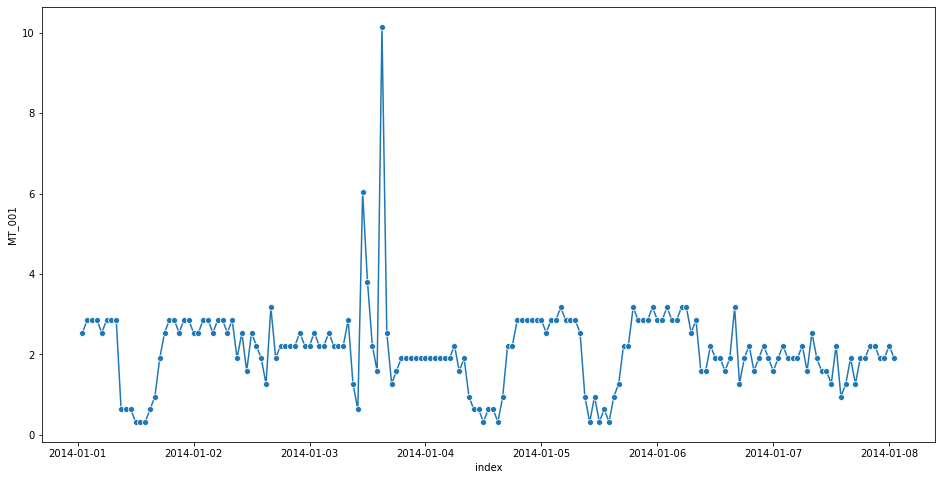

In [ ]:
# Create the plot
figure = plt.figure(figsize = (16, 8))
sns.lineplot(data = combined_data,
             x = 'index',
             y = 'MT_001',
             marker = 'o');

#### The Series with Missing Values

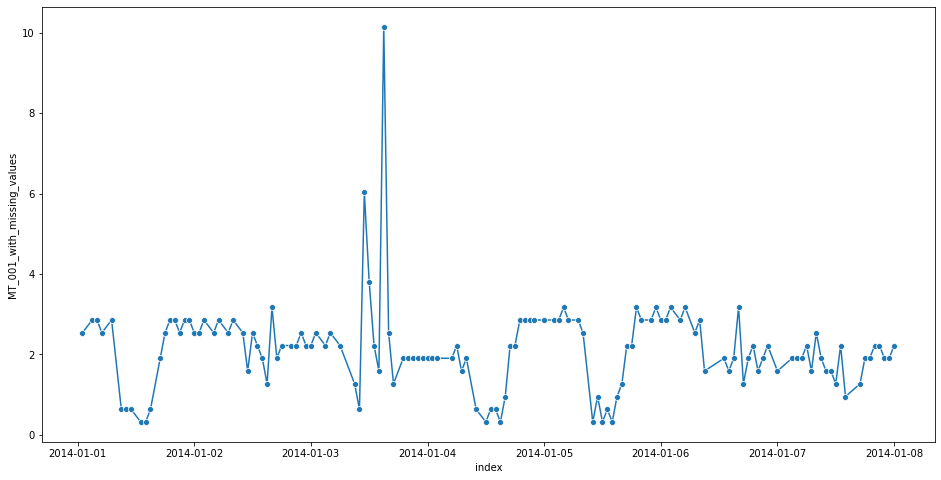

In [ ]:
# Create the plot
# Set the figure size
figure = plt.figure(figsize = (16, 8))

# Creating the line plot using seaborn library
sns.lineplot(data = combined_data,
             x = 'index',
             y = 'MT_001_with_missing_values',
             marker = 'o');

#### The Predicted Series

In [63]:
# Creating the plot
# Set the figure size
figure = plt.figure(figsize = (16, 8))

sns.lineplot(data = combined_data,
             x = 'index',
             y = 'Mean Predictions',
             marker = 'o');

NameError: name 'combined_data' is not defined

<Figure size 1600x800 with 0 Axes>